In [1]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imutils import build_montages
from imutils import paths
import random
import cv2

In [3]:
Data = pd.read_csv(r"G:\PYTHON\FinalYr_Phase-2\Meta_data.csv")

In [4]:
Data.head()

,Unnamed: 0,path,value
0,0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0
1,1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0
2,2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0
3,3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0
4,4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0


In [5]:
Data.drop(Data.columns[0], axis=1, inplace=True)

In [6]:
Data.head()

,path,value
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0


In [7]:
Data['split'] = np.random.randn(Data.shape[0], 1)

msk = np.random.rand(len(Data)) <= 0.8

train = Data[msk]
test = Data[~msk]

In [8]:
print(train.value.value_counts())
print(test.value.value_counts())

0    2940
2    2796
1    1637
Name: value, dtype: int64
2    704
0    676
1    408
Name: value, dtype: int64


In [9]:
train.reset_index(inplace=True)

In [10]:
train.drop(train.columns[0], axis=1, inplace=True)
train.head()

C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,path,value,split
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0,0.229576
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0,1.494493
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0,-0.859983
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0,0.120788
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1002.png,0,-0.187933


In [11]:
data = []
image_size = 224
test_pixel_data = []
import matplotlib.pyplot as plt
from PIL import Image


for i in range(len(train)):
    img_array = Image.open(train['path'][i])
    new_img_array = np.array(img_array)
    if new_img_array.ndim == 2:
        new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
    new_img_array = cv2.resize(new_img_array,(224,224))
    #print(i,np.array(new_img_array).shape,train['value'][i])
    data.append([new_img_array, train['value'][i]])


In [12]:
test.reset_index(inplace=True)

In [13]:
test.drop(test.columns[0], axis=1, inplace=True)
test.head()

C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,path,value,split
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0,0.824739
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1009.png,0,-0.729516
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1012.png,0,-0.066611
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1023.png,0,-0.045713
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1027.png,0,-0.532875


In [14]:
for i in range(len(test)):
    img_array = Image.open(test['path'][i])
    new_img_array = np.array(img_array)
    if new_img_array.ndim == 2:
        new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
    new_img_array = cv2.resize(new_img_array,(224,224))
    test_pixel_data.append(new_img_array)

In [15]:
np.random.shuffle(data)
x = []
y = []

counter = 406
count = 0

for image in data:
    try:
        x.append(image[0])
        y.append(image[1])
    except:
        print(count)
    count += 1

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [16]:
np.unique(y, return_counts=True)

(array([0, 1, 2], dtype=int64), array([2940, 1637, 2796], dtype=int64))

In [17]:
pd.Series(y).value_counts()

0    2940
2    2796
1    1637
dtype: int64

In [18]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 42,stratify=y)

In [19]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [20]:
test_pixel_data = np.array(test_pixel_data)

test_pixel_data = test_pixel_data/255

print(X_train.shape,X_val.shape,test_pixel_data.shape)

(5898, 224, 224, 3) (1475, 224, 224, 3) (1788, 224, 224, 3)


In [21]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(X_train,y_train,batch_size=8)

val_generator = val_datagen.flow(X_val,y_val,batch_size=8)

In [22]:
print(X_train.shape,y_train.shape,X_val.shape)

(5898, 224, 224, 3) (5898, 3) (1475, 224, 224, 3)


In [32]:
Y_VAL = np.array(list(pd.DataFrame(y_val).idxmax(axis=1)))

In [23]:
import tensorflow as tf
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from sklearn.metrics import accuracy_score,r2_score

In [24]:
# 224
model_den = load_model("G:\\PYTHON\\FinalYr_Phase-2\\weights\\Dense_net.h5")
model_res = load_model("G:\\PYTHON\\FinalYr_Phase-2\\weights\\ResNet50.h5")
model_inc = load_model("G:\\PYTHON\\FinalYr_Phase-2\\weights\\incpetion_v3.h5")
model_vg16 = load_model("G:\\PYTHON\\FinalYr_Phase-2\\weights\\VGG16.h5")

In [25]:
model_store = {
    "DenseNet": model_den,
    "ResNet" : model_res,
    "Inception" : model_inc,
    "VGG16":model_vg16
}
model_store_name = ["DenseNet","ResNet","Inception","VGG16"]

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore")

In [29]:
def confusionMatrix(Y_VAL,predictions):
    conf_matrix = confusion_matrix(Y_VAL,predictions)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

DenseNet ResNet



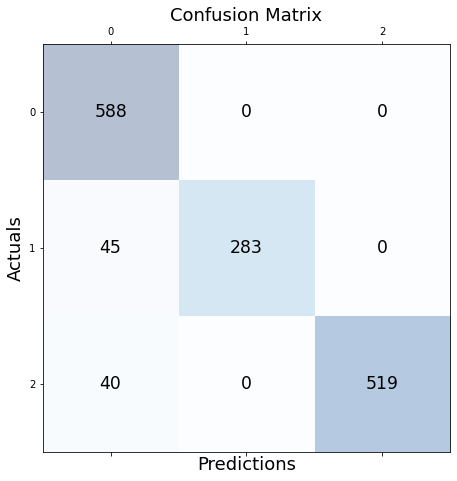

None
              precision    recall  f1-score   support

       COVID       0.87      1.00      0.93       588
   Non_COVID       1.00      0.86      0.93       328
      Normal       1.00      0.93      0.96       559

    accuracy                           0.94      1475
   macro avg       0.96      0.93      0.94      1475
weighted avg       0.95      0.94      0.94      1475

DenseNet Inception



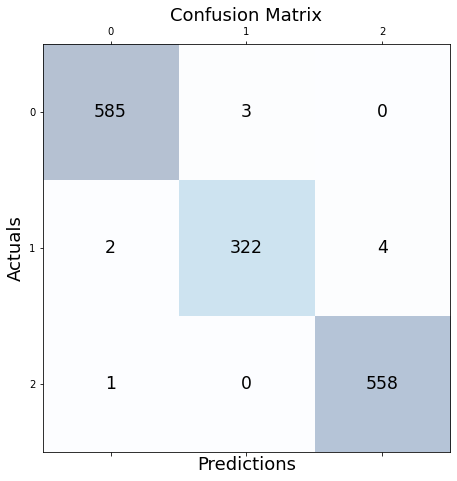

None
              precision    recall  f1-score   support

       COVID       0.99      0.99      0.99       588
   Non_COVID       0.99      0.98      0.99       328
      Normal       0.99      1.00      1.00       559

    accuracy                           0.99      1475
   macro avg       0.99      0.99      0.99      1475
weighted avg       0.99      0.99      0.99      1475

DenseNet VGG16



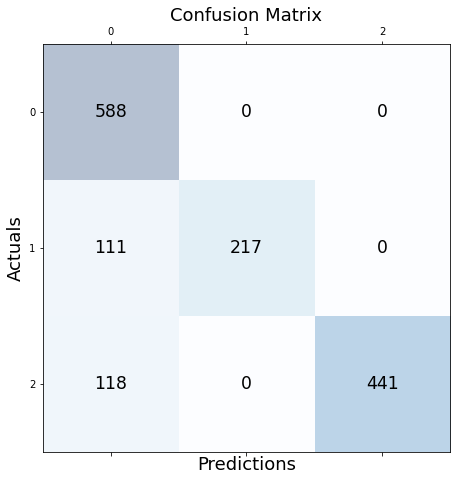

 33%|███████████████████████████▋                                                       | 1/3 [12:26<24:52, 746.20s/it]

None
              precision    recall  f1-score   support

       COVID       0.72      1.00      0.84       588
   Non_COVID       1.00      0.66      0.80       328
      Normal       1.00      0.79      0.88       559

    accuracy                           0.84      1475
   macro avg       0.91      0.82      0.84      1475
weighted avg       0.89      0.84      0.85      1475

ResNet Inception



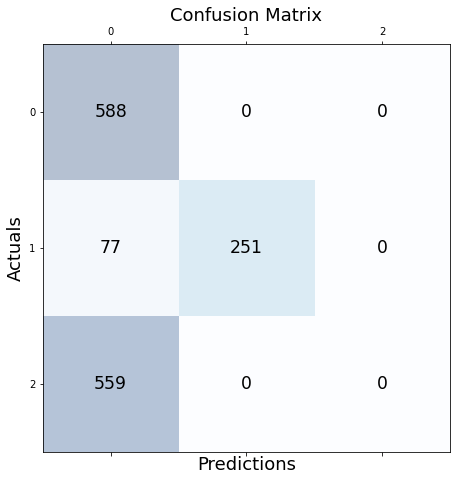

None
              precision    recall  f1-score   support

       COVID       0.48      1.00      0.65       588
   Non_COVID       1.00      0.77      0.87       328
      Normal       0.00      0.00      0.00       559

    accuracy                           0.57      1475
   macro avg       0.49      0.59      0.51      1475
weighted avg       0.41      0.57      0.45      1475

ResNet VGG16



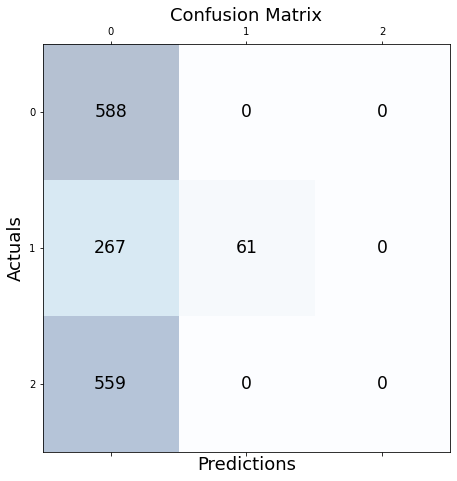

 67%|███████████████████████████████████████████████████████▎                           | 2/3 [19:10<09:04, 544.88s/it]

None
              precision    recall  f1-score   support

       COVID       0.42      1.00      0.59       588
   Non_COVID       1.00      0.19      0.31       328
      Normal       0.00      0.00      0.00       559

    accuracy                           0.44      1475
   macro avg       0.47      0.40      0.30      1475
weighted avg       0.39      0.44      0.30      1475

Inception VGG16



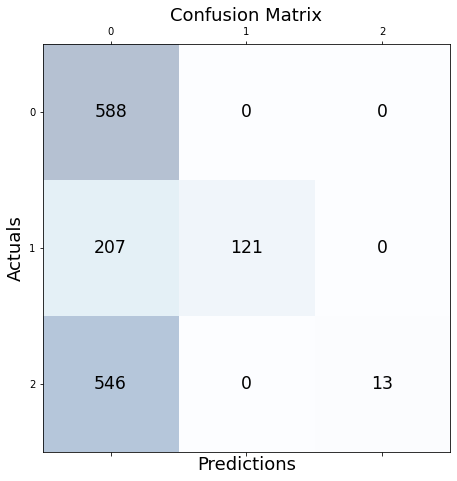

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [22:37<00:00, 452.52s/it]

None
              precision    recall  f1-score   support

       COVID       0.44      1.00      0.61       588
   Non_COVID       1.00      0.37      0.54       328
      Normal       1.00      0.02      0.05       559

    accuracy                           0.49      1475
   macro avg       0.81      0.46      0.40      1475
weighted avg       0.78      0.49      0.38      1475



In [37]:
for ptr1 in tqdm(range(len(model_store_name)-1)):
    for ptr2 in range(ptr1+1,len(model_store_name)):
        print(model_store_name[ptr1],model_store_name[ptr2])
        print()
        model1 = model_store[model_store_name[ptr1]]
        model2 = model_store[model_store_name[ptr2]]
        store = []
        for img in X_val:
            dt = []
            dt.append(img)
            X = np.array(dt)
            X = X/255
            preds = [model1.predict(X), model2.predict(X)]
            weights = [0.5,0.5]
            weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
            store.append(np.argmax(weighted_preds,axis=1))
        #print(store,Y_VAL)
        print(confusionMatrix(Y_VAL,store))
        target_names = ["COVID","Non_COVID","Normal"]
        print(classification_report(Y_VAL,store, target_names=target_names))

In [38]:
%matplotlib inline
# get sample image to test.
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_covid = 'G:\\PYTHON\\Final_year_project\\Final\\covid_image_data\\covid_image_data\\Images\\COVID\\COVID-3.png'
img_normal = 'G:\\PYTHON\\FinalYr_Phase-2\\Normal\\Normal-99.png'
img_test = 'G:\\PYTHON\\FinalYr_Phase-2\\NON_COVID\\Non_COVID-15.png'

img_array = Image.open(img_test)
new_img_array = np.array(img_array)
if new_img_array.ndim == 2:
    new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
new_img_array = cv2.resize(new_img_array,(224,224))




dt = []
dt.append(new_img_array)
X = np.array(dt)
X = X/255
val = model.predict(X)
print("Prediction :",np.argmax(val,axis=1))

Prediction : [1]
